In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Abrindo dados

In [2]:
df_cluster = pd.read_parquet(path="./../data/clean_data/clustered_kmeans_5.parquet")
df_cluster

,comdate_diff,freight_value,price,days_since_year_start_commercial,days_since_month_start_commercial,year_commercial,month_commercial,day_of_month_commercial,day_of_week_commercial,days_since_year_start_purchase,days_since_month_start_purchase,year_purchase,month_purchase,day_of_month_purchase,day_of_week_purchase,filtered_category_coded,commercial_date_coded,time_window_order_coded,kmeans_5
1,11,46.48,289.00,0,0,2018,1,1,0,11,11,2018,1,12,4,14,7,1,1.0
5,-28,22.31,259.90,284,11,2017,10,12,3,256,13,2017,9,14,3,6,7,1,4.0
6,-17,7.78,14.99,66,7,2018,3,8,3,49,18,2018,2,19,0,8,1,0,0.0
8,17,14.10,25.00,0,0,2018,1,1,0,17,17,2018,1,18,3,3,7,1,0.0
9,7,22.57,99.90,0,0,2018,1,1,0,7,7,2018,1,8,0,9,9,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115012,-8,20.88,55.00,358,24,2017,12,25,0,350,16,2017,12,17,6,14,6,0,NaN
115014,3,14.16,114.90,90,0,2018,4,1,6,93,3,2018,4,4,2,6,8,1,NaN
115015,7,19.04,37.00,90,0,2018,4,1,6,97,7,2018,4,8,6,2,8,1,NaN
115016,-21,22.07,689.00,327,23,2017,11,24,4,306,2,2017,11,3,4,12,0,0,NaN


## EDA

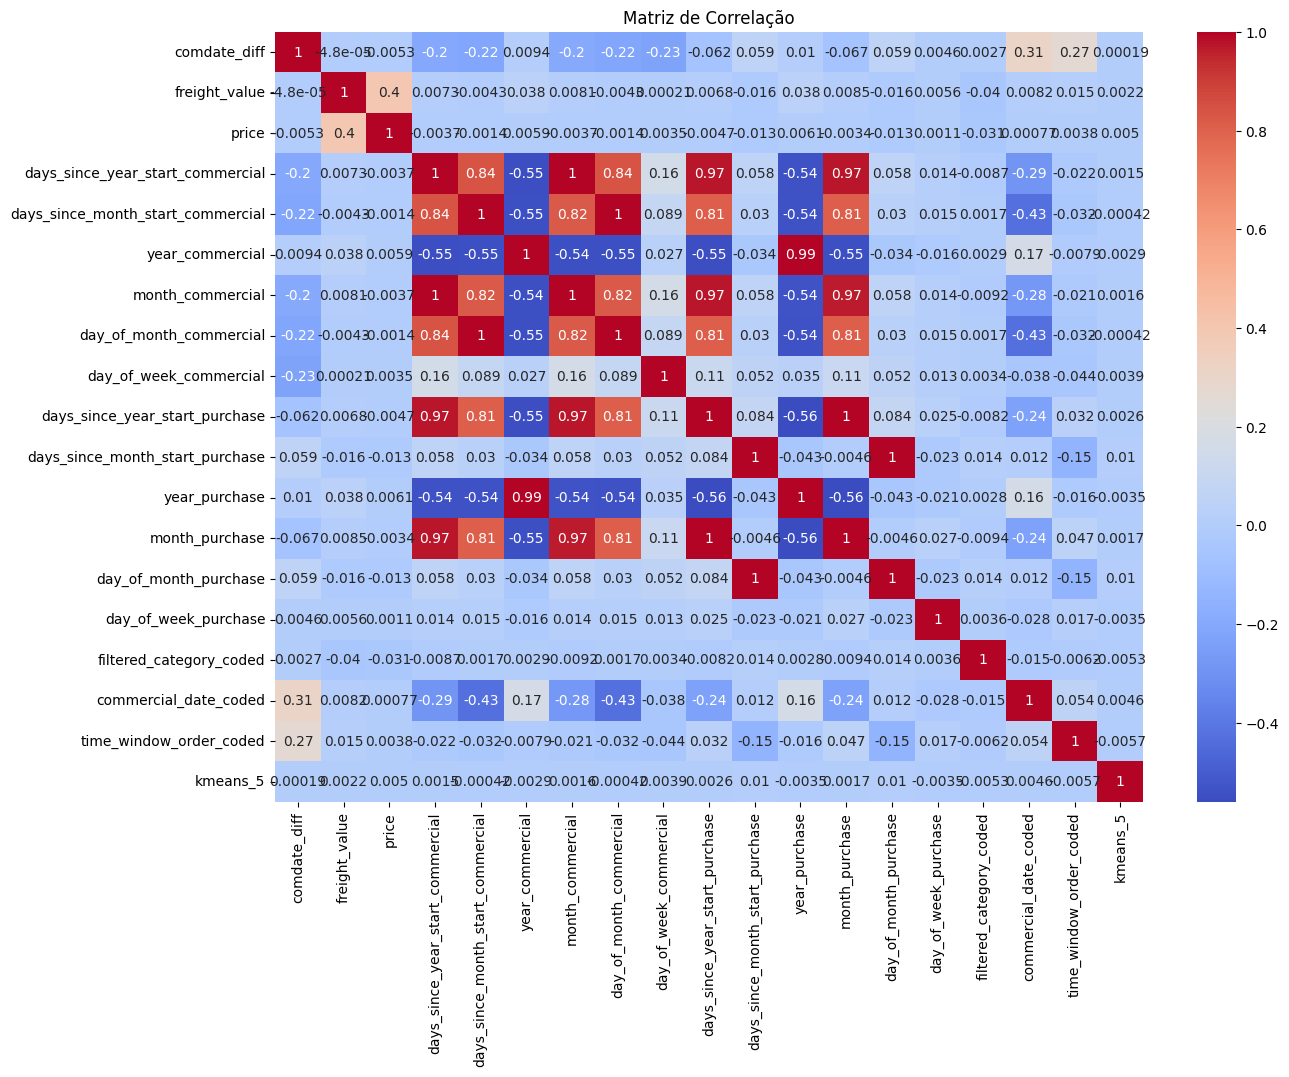

In [3]:
fig, axis = plt.subplots(figsize=[14, 10])
sns.heatmap(df_cluster.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()